# Caracterizando al cluster de clientes numero 5

Gracias a la tabla de Características Distintivas sabemos de este grupo que:

1. Para clientes de este grupo el artículo comprado es joyería en la categoria de accesorios
2. Proceden de los estados de: Alabama, Mississippi, Louisiana, Kansas, Georgia, Kentucky, South Dakota, Vermont, Nebraska 

Hay que mencionar que este cluster en la variable Previous Purchases tiene una media y mediana superior a la de esta misma variables pero a nivel general de los datos (a la que tendria si no segmetaramos en clusters)

Gracias a la tabla de Análisis Comparativo del Clúster 1 vs. Otros Clústeres sabemos de este grupo que:

1. Para las variables Review Rating y Previous Purchases no existen clusters con media, mediana y dispersion significativamente menor que este 
2. Para la variable Age no existen clusters con con media y  mediana significativamente menor que este sin embargo si existen clusters menos dispersos que este los cuales son 8, 7, 11, 0, 9 
3. Para la variable Purchase Amount (USD) no existen cluster con mediana significativamente menor, existe un cluster con media y dispersion inferior a este que es ek cluster 0

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kruskal, chi2_contingency, mannwhitneyu
from IPython.display import display, Markdown

df_customer = pd.read_csv("dataset/segmented_customers.csv")
# df_customer.head()

# Filtramos el DataFrame para el Clúster 5 (etiquetado como 5) 
df_cluster_5 = df_customer[df_customer['Cluster'] == 4].copy()

#### Pregunta 1: ¿Existe una diferencia significativa en el número de compras previas entre los distintos grupos de edad de este clúster?

In [17]:
# === Preparación de los datos: Creación de Grupos de Edad ===
print("### Creando 4 grupos de edad ###")

# Definir los rangos de edad
bins = [18, 30, 45, 60, 70]
labels = ['18-30', '31-45', '46-60', '61-70']
df_cluster_5['Age_Group'] = pd.cut(df_cluster_5['Age'], bins=bins, labels=labels, right=False)

# === Análisis Estadístico: Prueba de Kruskal-Wallis ===
print("\n" + "="*70 + "\n")
print("### Realizando la prueba de Kruskal-Wallis ###")

# Separar los datos de 'Previous Purchases' por cada grupo de edad
groups = [df_cluster_5[df_cluster_5['Age_Group'] == label]['Previous Purchases'].dropna() for label in labels]
groups = [group for group in groups if not group.empty] # Filtrar grupos vacíos

# Realizar la prueba
if len(groups) > 1:
    h_stat, p_value = kruskal(*groups)
    print(f"Estadístico H de Kruskal-Wallis: {h_stat:.4f}")
    print(f"Valor p: {p_value:.4f}")

    # === Conclusión ===
    alpha = 0.05  # Nivel de significancia
    print("\n### Conclusión del Análisis Estadístico ###")
    if p_value < alpha:
        print(f"Dado que el valor p ({p_value:.4f}) es menor que el nivel de significancia ({alpha}),")
        print("podemos rechazar la hipótesis nula de que las medianas son iguales.")
        print("Existe una diferencia estadísticamente significativa en el número de compras previas entre los grupos de edad.")
    else:
        print(f"Dado que el valor p ({p_value:.4f}) es mayor o igual que el nivel de significancia ({alpha}),")
        print("no podemos rechazar la hipótesis nula.")
        print("No hay evidencia estadísticamente significativa de una diferencia en el número de compras previas entre los grupos de edad.")
else:
    print("No hay suficientes grupos con datos para realizar la prueba de Kruskal-Wallis.")



### Creando 4 grupos de edad ###


### Realizando la prueba de Kruskal-Wallis ###
Estadístico H de Kruskal-Wallis: 1.0776
Valor p: 0.7825

### Conclusión del Análisis Estadístico ###
Dado que el valor p (0.7825) es mayor o igual que el nivel de significancia (0.05),
no podemos rechazar la hipótesis nula.
No hay evidencia estadísticamente significativa de una diferencia en el número de compras previas entre los grupos de edad.




### Generando el Mapa de Calor ###


C:\Users\delhy.py\AppData\Local\Temp\ipykernel_7024\1637950197.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df_cluster_5.groupby('Age_Group')['Previous Purchases'].mean().reset_index()
C:\Users\delhy.py\AppData\Local\Temp\ipykernel_7024\1637950197.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = heatmap_data.pivot_table(index='Age_Group', values='Previous Purchases')


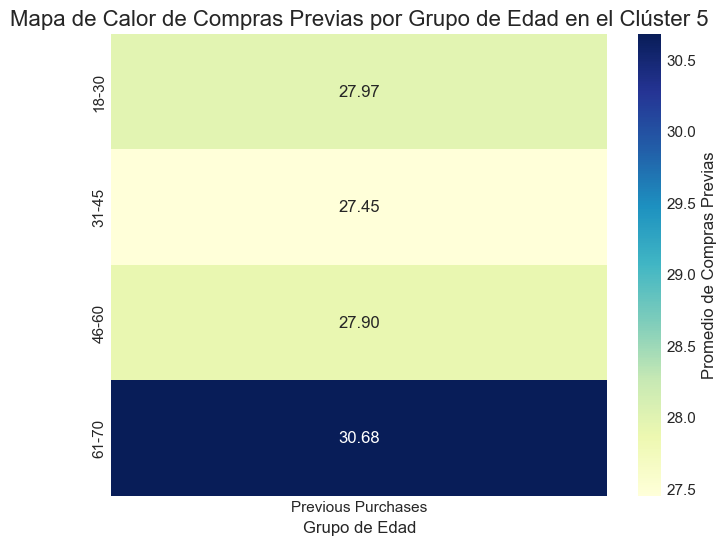

In [18]:
# === Visualización: Mapa de Calor ===
print("\n" + "="*70 + "\n")
print("### Generando el Mapa de Calor ###")

# Crear una tabla dinámica con la media de 'Previous Purchases' para cada grupo de edad
heatmap_data = df_cluster_5.groupby('Age_Group')['Previous Purchases'].mean().reset_index()
heatmap_data = heatmap_data.pivot_table(index='Age_Group', values='Previous Purchases')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Promedio de Compras Previas'})
plt.title('Mapa de Calor de Compras Previas por Grupo de Edad en el Clúster 5', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('')
plt.show()

Me llama la antecion que la franja de edad de 61-70 tenga mas compras en promedio que el resto por tanto tratemolos como 2 grupos distintos  y veamos si esta diferencia realmente existe

In [19]:
# === Análisis Estadístico: Prueba de Mann-Whitney U ===
print("\n" + "="*70 + "\n")
print("### Realizando la prueba de Mann-Whitney U ###")
print("Comparando el grupo 61-70 años con el resto de los grupos")

# Separar los datos del grupo 61-70 y el resto
group_61_70 = df_cluster_5[df_cluster_5['Age_Group'] == '61-70']['Previous Purchases'].dropna()
other_groups = df_cluster_5[df_cluster_5['Age_Group'] != '61-70']['Previous Purchases'].dropna()

# Realizar la prueba
if not group_61_70.empty and not other_groups.empty:
    u_stat, p_value = mannwhitneyu(group_61_70, other_groups, alternative='greater')
    print(f"Estadístico U de Mann-Whitney U: {u_stat:.4f}")
    print(f"Valor p: {p_value:.4f}")

    # === Conclusión ===
    alpha = 0.05  # Nivel de significancia
    print("\n### Conclusión de la prueba de Mann-Whitney U ###")
    if p_value < alpha:
        print(f"Dado que el valor p ({p_value:.4f}) es menor que el nivel de significancia ({alpha}),")
        print("podemos rechazar la hipótesis nula.")
        print("Existe evidencia estadísticamente significativa de que el grupo de 61-70 años tiene más compras previas que los otros grupos.")
    else:
        print(f"Dado que el valor p ({p_value:.4f}) es mayor o igual que el nivel de significancia ({alpha}),")
        print("no podemos rechazar la hipótesis nula.")
        print("No hay evidencia estadísticamente significativa de que el grupo de 61-70 años tenga más compras previas que los otros grupos.")
else:
    print("No hay suficientes datos para realizar la prueba de Mann-Whitney U.")




### Realizando la prueba de Mann-Whitney U ###
Comparando el grupo 61-70 años con el resto de los grupos
Estadístico U de Mann-Whitney U: 2875.5000
Valor p: 0.1786

### Conclusión de la prueba de Mann-Whitney U ###
Dado que el valor p (0.1786) es mayor o igual que el nivel de significancia (0.05),
no podemos rechazar la hipótesis nula.
No hay evidencia estadísticamente significativa de que el grupo de 61-70 años tenga más compras previas que los otros grupos.


Conclusiones:

El análisis de nuestro grupo de clientes de Clúster 5 nos arrojó un resultado interesante. Aunque al principio parecía que las personas mayores de 60 años compraban más que el resto, las pruebas estadísticas nos mostraron que esta diferencia no es significativa. En otras palabras, la variación en las compras entre las personas de un mismo grupo de edad es tan grande que no podemos afirmar que la edad sea un factor determinante.

En conclusión, no podemos usar la edad como un factor para predecir si un cliente de este grupo hará más o menos compras. Las diferencias que vimos podrían ser simplemente una coincidencia. Es importante no sacar conclusiones basándonos solo en lo que vemos en los gráficos, ya que la estadística nos ayuda a entender si esas diferencias son reales o si son solo producto del azar.

#### Pregunta 2: ¿Existe una diferencia significativa en la mediana de compras previas entre géneros en el Clúster 5?

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_7024\2296454545.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Previous Purchases', data=df_cluster_5, palette=['skyblue', 'lightcoral'])


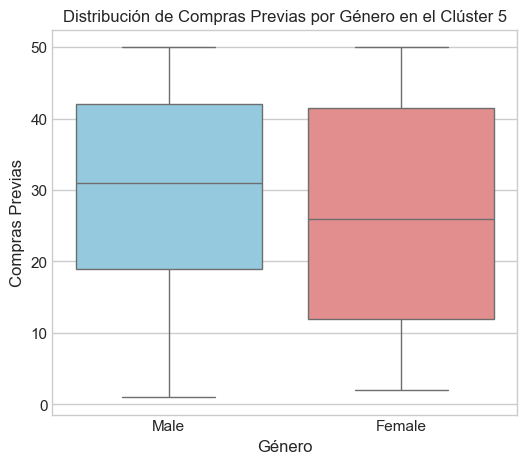

In [20]:
# --- 1. Gráfico de Caja y Bigotes para Visualización ---
# Configurar el tamaño del gráfico
plt.figure(figsize=(6, 5))
# Crear el gráfico de caja y bigotes
# Añadimos el parámetro 'palette' para especificar los colores para cada género.
# 'skyblue' para 'Female' y 'lightcoral' para 'Male'.
sns.boxplot(x='Gender', y='Previous Purchases', data=df_cluster_5, palette=['skyblue', 'lightcoral'])

# Añadir títulos y etiquetas para mayor claridad
plt.title('Distribución de Compras Previas por Género en el Clúster 5')
plt.xlabel('Género')
plt.ylabel('Compras Previas')

# Mostrar el gráfico
plt.show()

In [21]:
# --- 2. Prueba de Mann-Whitney U para Demostrar la Influencia ---

# Separar los datos de las compras previas por género
compras_mujeres = df_cluster_5[df_cluster_5['Gender'] == 'Female']['Previous Purchases']
compras_hombres = df_cluster_5[df_cluster_5['Gender'] == 'Male']['Previous Purchases']

# Realizar la prueba de Mann-Whitney U.
statistic, p_value = stats.mannwhitneyu(compras_mujeres, compras_hombres)

# Imprimir los resultados de la prueba
print("\n# Resultados de la prueba de Mann-Whitney U")
print(f"Estadístico U: {statistic}")
print(f"Valor p: {p_value:.4f}")

# Interpretar el valor p para llegar a una conclusión
alpha = 0.05  # Nivel de significancia común (95% de confianza)

if p_value < alpha:
    print("\n# Conclusión: Existe una diferencia estadísticamente significativa en la mediana de las compras previas entre géneros.")
    print("Esto significa que podemos rechazar la hipótesis nula ($$H_0$$).")
else:
    print("\n# Conclusión: No existe una diferencia estadísticamente significativa en la mediana de las compras previas entre géneros.")
    print("Las diferencias observadas en el gráfico son probablemente debidas al azar y no se puede rechazar la hipótesis nula ($$H_0$$).")



# Resultados de la prueba de Mann-Whitney U
Estadístico U: 2644.0
Valor p: 0.2117

# Conclusión: No existe una diferencia estadísticamente significativa en la mediana de las compras previas entre géneros.
Las diferencias observadas en el gráfico son probablemente debidas al azar y no se puede rechazar la hipótesis nula ($$H_0$$).


Conclusiones 

El análisis estadístico, respaldado por el gráfico de caja y bigotes, muestra que no hay una diferencia significativa en el número de compras previas entre clientes masculinos y femeninos dentro del Clúster 5. La prueba de Mann-Whitney U arrojó un valor p de 0.2117, que es superior al umbral de significancia comúnmente aceptado de 0.05. Este resultado indica que las pequeñas variaciones observadas en el gráfico son probablemente el resultado del azar y no una característica inherente a las diferencias de género en este segmento de clientes.

Este hallazgo es crucial para nuestra estrategia de marketing. Sugiere que, para el Clúster 5, las iniciativas de fidelización y venta no necesitan ser diferenciadas por género basándose en el historial de compras. En su lugar, el equipo podría concentrarse en otros factores o características del clúster que sí influyan en el comportamiento de compra, como la edad, la ubicación geográfica o las preferencias de producto, para optimizar la personalización y maximizar el retorno de inversión.

### Pregunta 3: ¿Existe una diferencia estadísticamente significativa en el monto de compra de joyas entre las diferentes estaciones?

In [22]:
# 1. Contar la frecuencia de cada estación en el Clúster 4.
conteo_estaciones = df_cluster_5['Season'].value_counts()

# 2. Calcular la proporción de cada estación para una mejor comprensión.
proporcion_estaciones = df_cluster_5['Season'].value_counts(normalize=True) * 100

# Imprimir los resultados.
print("# Conteo de Compras de Joyas por Estación en Clúster 4")
print(conteo_estaciones)

print("\n# Proporción de Compras de Joyas por Estación en Clúster 4 (%)")
print(proporcion_estaciones)

# Conteo de Compras de Joyas por Estación en Clúster 4
Season
Winter    46
Summer    46
Spring    42
Fall      35
Name: count, dtype: int64

# Proporción de Compras de Joyas por Estación en Clúster 4 (%)
Season
Winter    27.218935
Summer    27.218935
Spring    24.852071
Fall      20.710059
Name: proportion, dtype: float64


C:\Users\delhy.py\AppData\Local\Temp\ipykernel_7024\2008448814.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo_estaciones.index, y=conteo_estaciones.values, palette="rocket")


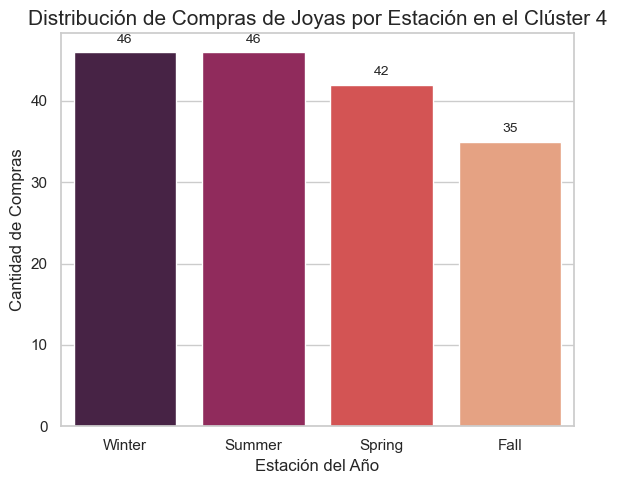

In [23]:
# 3. Visualizar la distribución de estaciones con un gráfico de barras.
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras.
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=conteo_estaciones.index, y=conteo_estaciones.values, palette="rocket")

# Añadir títulos y etiquetas.
plt.title('Distribución de Compras de Joyas por Estación en el Clúster 4', fontsize=15)
plt.xlabel('Estación del Año', fontsize=12)
plt.ylabel('Cantidad de Compras', fontsize=12)

# Añadir etiquetas de texto a las barras.
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10)

plt.tight_layout()
plt.show()

# Resultados de la prueba de Kruskal-Wallis
Estadístico H de Kruskal-Wallis: 4.0860
Valor p: 0.2523

# Conclusión del Análisis
El valor p (0.2523) es mayor o igual que el nivel de significancia (0.05).
No hay una diferencia estadísticamente significativa en el monto de compra de joyas entre las estaciones.


C:\Users\delhy.py\AppData\Local\Temp\ipykernel_7024\4082051263.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Purchase Amount (USD)', data=df_cluster_5, palette="viridis")


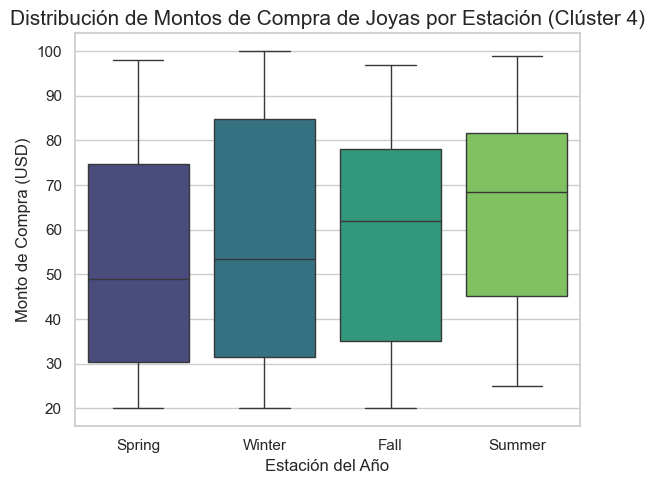

In [24]:
# 1. Se obtienen los datos de 'Purchase Amount (USD)' para cada una de las estaciones.
# Se usa .dropna() para eliminar valores NaN si los hubiera, lo que asegura que la prueba funcione.
try:
    compras_primavera = df_cluster_5[df_cluster_5['Season'] == 'Spring']['Purchase Amount (USD)'].dropna()
    compras_verano = df_cluster_5[df_cluster_5['Season'] == 'Summer']['Purchase Amount (USD)'].dropna()
    compras_otoño = df_cluster_5[df_cluster_5['Season'] == 'Fall']['Purchase Amount (USD)'].dropna()
    compras_invierno = df_cluster_5[df_cluster_5['Season'] == 'Winter']['Purchase Amount (USD)'].dropna()

    # 2. Realizar la prueba de Kruskal-Wallis
    # La prueba compara la distribución de los montos de compra entre las diferentes estaciones.
    # El '*' desempaqueta la lista de DataFrames en argumentos separados para la función kruskal.
    # Solo se incluyen los grupos que no están vacíos.
    grupos = [compras_primavera, compras_verano, compras_otoño, compras_invierno]
    grupos_sin_vacios = [g for g in grupos if not g.empty]

    # La prueba requiere al menos dos grupos con datos para funcionar.
    if len(grupos_sin_vacios) > 1:
        kruskal_stat, p_value = kruskal(*grupos_sin_vacios)

        # 3. Imprimir los resultados
        print("# Resultados de la prueba de Kruskal-Wallis")
        print(f"Estadístico H de Kruskal-Wallis: {kruskal_stat:.4f}")
        print(f"Valor p: {p_value:.4f}")

        # 4. Conclusión
        alpha = 0.05
        print("\n# Conclusión del Análisis")
        if p_value < alpha:
            print(f"El valor p ({p_value:.4f}) es menor que el nivel de significancia (0.05).")
            print("Existe una diferencia estadísticamente significativa en el monto de compra de joyas entre las estaciones.")
        else:
            print(f"El valor p ({p_value:.4f}) es mayor o igual que el nivel de significancia (0.05).")
            print("No hay una diferencia estadísticamente significativa en el monto de compra de joyas entre las estaciones.")
    else:
        print("No hay suficientes estaciones con datos para realizar la prueba de Kruskal-Wallis.")
        print("Se requieren al menos dos grupos con datos.")

except Exception as e:
    print(f"Ocurrió un error al intentar realizar la prueba: {e}")

# 5. Visualización para apoyar el análisis
plt.figure(figsize=(6, 5))
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=df_cluster_5, palette="viridis")
plt.title('Distribución de Montos de Compra de Joyas por Estación (Clúster 4)', fontsize=15)
plt.xlabel('Estación del Año', fontsize=12)
plt.ylabel('Monto de Compra (USD)', fontsize=12)
plt.tight_layout()
plt.show()

Conclusión:

El análisis muestra que el monto de compra de joyas no varía de forma estadísticamente significativa a lo largo de las estaciones del año. Por lo tanto, no se pueden identificar patrones estacionales en el gasto de los clientes de este clúster. Esto sugiere que las campañas de marketing o estrategias de ventas no necesitan ser ajustadas específicamente para cada estación en lo que respecta a los montos de compra.

#### Pregunta 4: ¿Existe una diferencia en la cantidad de compras previas entre los clientes que aplicaron un descuento y los que no?


C:\Users\delhy.py\AppData\Local\Temp\ipykernel_7024\2886741682.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discount Applied', y='Previous Purchases', data=df_cluster_5, palette="pastel")


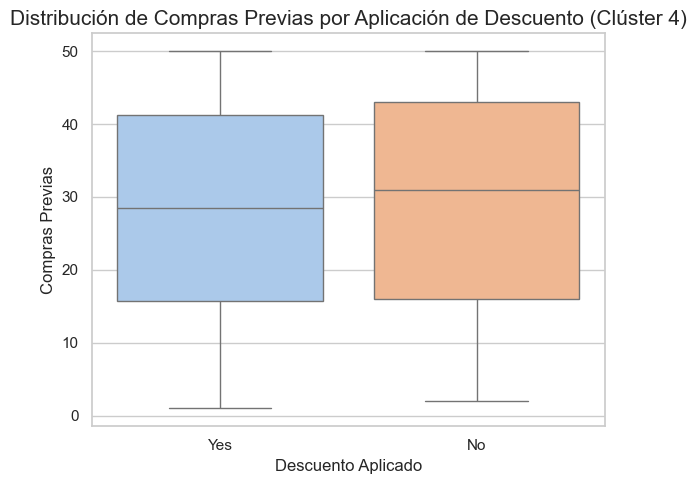

In [25]:
#  Visualización para apoyar el análisis
plt.figure(figsize=(6, 5))
sns.boxplot(x='Discount Applied', y='Previous Purchases', data=df_cluster_5, palette="pastel")
plt.title('Distribución de Compras Previas por Aplicación de Descuento (Clúster 4)', fontsize=15)
plt.xlabel('Descuento Aplicado', fontsize=12)
plt.ylabel('Compras Previas', fontsize=12)
plt.tight_layout()
plt.show()

In [26]:
# 1. Se obtienen los datos de 'Previous Purchases' para los dos grupos.
# Se usa .dropna() para eliminar valores NaN si los hubiera.
try:
    compras_con_descuento = df_cluster_5[df_cluster_5['Discount Applied'] == 'Yes']['Previous Purchases'].dropna()
    compras_sin_descuento = df_cluster_5[df_cluster_5['Discount Applied'] == 'No']['Previous Purchases'].dropna()

    # 2. Realizar la prueba de Mann-Whitney U
    # Esta prueba no paramétrica es adecuada para comparar las distribuciones de un
    # grupo cuantitativo entre dos grupos independientes, sin asumir normalidad.
    if not compras_con_descuento.empty and not compras_sin_descuento.empty:
        mannwhitney_stat, p_value = mannwhitneyu(compras_con_descuento, compras_sin_descuento, alternative='two-sided')

        # 3. Imprimir los resultados
        print("# Resultados de la prueba de Mann-Whitney U")
        print(f"Estadístico U de Mann-Whitney: {mannwhitney_stat:.4f}")
        print(f"Valor p: {p_value:.4f}")

        # 4. Conclusión
        alpha = 0.05
        print("\n# Conclusión del Análisis")
        if p_value < alpha:
            print(f"El valor p ({p_value:.4f}) es menor que el nivel de significancia ({alpha}).")
            print("Existe una diferencia estadísticamente significativa en el número de compras previas entre los clientes que aplicaron un descuento y los que no.")
        else:
            print(f"El valor p ({p_value:.4f}) es mayor o igual que el nivel de significancia ({alpha}).")
            print("No hay una diferencia estadísticamente significativa en el número de compras previas entre los clientes que aplicaron un descuento y los que no.")
    else:
        print("No hay suficientes datos en ambos grupos para realizar la prueba de Mann-Whitney U.")
        print("Se requieren al menos dos grupos con datos.")

except Exception as e:
    print(f"Ocurrió un error al intentar realizar la prueba: {e}")


# Resultados de la prueba de Mann-Whitney U
Estadístico U de Mann-Whitney: 3252.0000
Valor p: 0.3735

# Conclusión del Análisis
El valor p (0.3735) es mayor o igual que el nivel de significancia (0.05).
No hay una diferencia estadísticamente significativa en el número de compras previas entre los clientes que aplicaron un descuento y los que no.


Conclusiones

No se encontró una relación estadísticamente significativa entre el uso de descuentos y el historial de compras de los clientes en este grupo. Esto sugiere que las estrategias de descuento no influyen de manera significativa en la cantidad de compras previas que un cliente ha realizado.

#### Pregunta 5: ¿Existe una asociación estadísticamente significativa entre el género de los clientes y la aplicación de un descuento?

# Tabla de Contingencia
Discount Applied  No  Yes
Gender                   
Female            51    0
Male              42   76

# Resultados de la Prueba de Chi-Cuadrado
Estadístico Chi-Cuadrado: 57.1163
Valor p: 0.0000
Grados de libertad: 1

# Conclusión del Análisis
El valor p (0.0000) es menor que el nivel de significancia (0.05).
Existe una asociación estadísticamente significativa entre el género y la aplicación de un descuento.


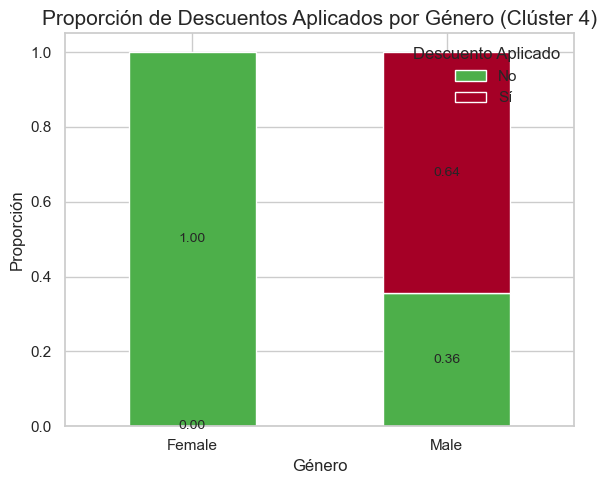

In [27]:
try:
    # 1. Crear una tabla de contingencia
    contingency_table = pd.crosstab(df_cluster_5['Gender'], df_cluster_5['Discount Applied'])
    print("# Tabla de Contingencia")
    print(contingency_table)

    # 2. Realizar la prueba de chi-cuadrado de independencia
    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

    # 3. Imprimir los resultados
    print("\n# Resultados de la Prueba de Chi-Cuadrado")
    print(f"Estadístico Chi-Cuadrado: {chi2_stat:.4f}")
    print(f"Valor p: {p_value:.4f}")
    print(f"Grados de libertad: {dof}")

    # 4. Conclusión estadística
    alpha = 0.05
    print("\n# Conclusión del Análisis")
    if p_value < alpha:
        print(f"El valor p ({p_value:.4f}) es menor que el nivel de significancia ({alpha}).")
        print("Existe una asociación estadísticamente significativa entre el género y la aplicación de un descuento.")
    else:
        print(f"El valor p ({p_value:.4f}) es mayor o igual que el nivel de significancia ({alpha}).")
        print("No hay una asociación estadísticamente significativa entre el género y la aplicación de un descuento.")

    # 5. Generar el gráfico de barras apiladas
    # Convertir las frecuencias de la tabla de contingencia en proporciones
    proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)

    # Crear el gráfico de barras apiladas
    ax = proportions.plot(kind='bar', stacked=True, figsize=(6, 5), rot=0, color=['#4daf4a', '#a50026'])
    
    # Personalizar el gráfico
    plt.title('Proporción de Descuentos Aplicados por Género (Clúster 4)', fontsize=15)
    plt.xlabel('Género', fontsize=12)
    plt.ylabel('Proporción', fontsize=12)
    plt.legend(title='Descuento Aplicado', labels=['No', 'Sí'])

    # Añadir etiquetas de valor a las barras
    for c in ax.containers:
        ax.bar_label(c, fmt='%.2f', label_type='center', fontsize=10)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Ocurrió un error al intentar realizar la prueba: {e}")


Conclusiones 

Los resultados de la prueba de chi-cuadrado demuestran que la relación entre el género y el uso de un descuento no es aleatoria. Las proporciones observadas en la gráfica de barras apiladas son estadísticamente significativas. El hallazgo más notable es que el 64% de los hombres en este clúster aplicaron un descuento, lo cual es una proporción considerablemente mayor en comparación con el otro grupo de género.

#### Pregunta 6: ¿Existe una relación significativa entre el género de un cliente y su estado de suscripción dentro del Clúster 4?"

In [31]:
# Configurar el estilo de los gráficos para una visualización clara
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("rainbow") # Elegir una paleta de colores para este análisis

# =========================================================================
# Paso 1: Realizar la prueba de Chi-Cuadrado de independencia
# =========================================================================

# Crear una tabla de contingencia a partir del DataFrame df_cluster_5
# Esta tabla muestra las frecuencias de cada combinación de género y estado de suscripción.
contingency_table = pd.crosstab(df_cluster_5['Gender'], df_cluster_5['Subscription Status'])
print("Tabla de Contingencia para el Clúster 4:")
print(contingency_table)
print("\n" + "="*50 + "\n")

# Realizar la prueba de chi-cuadrado para determinar si existe una asociación
# entre las dos variables.
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Imprimir los resultados estadísticos clave
print(f"Estadístico de Chi-cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Grados de libertad (dof): {dof}")
print("\n" + "="*50 + "\n")

Tabla de Contingencia para el Clúster 4:
Subscription Status  No  Yes
Gender                      
Female               51    0
Male                 75   43


Estadístico de Chi-cuadrado: 23.0432
Valor p: 0.0000
Grados de libertad (dof): 1




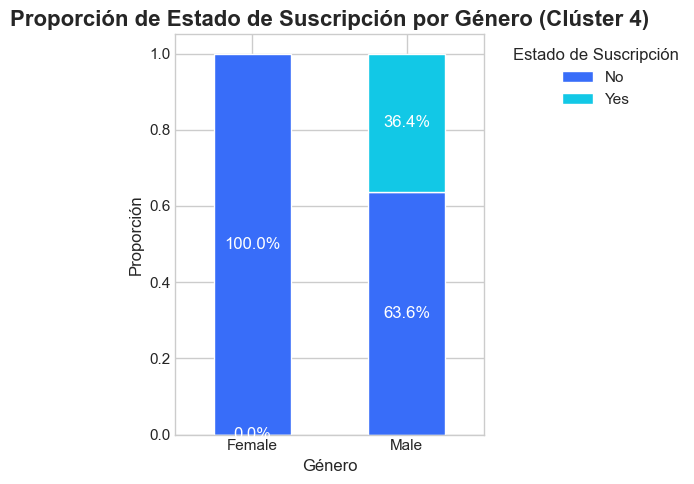



# ¿Existe una asociación estadísticamente significativa entre el género y el estado de suscripción en el Clúster 4?
Para determinarlo, se utilizó una prueba de chi-cuadrado y se visualizó la distribución con un gráfico de barras apiladas.

**Conclusiones Post-Análisis**
El valor p (0.0000) es menor que el nivel de significancia (0.05).
Esto indica una asociación estadísticamente significativa entre el género y el estado de suscripción para los clientes de este clúster.
El gráfico de barras apiladas te mostrará visualmente dónde se encuentran las diferencias.


In [32]:
# =========================================================================
# Paso 2: Generar el gráfico de barras apiladas
# =========================================================================

# Normalizar la tabla para mostrar las proporciones porcentuales.
proportions = contingency_table.div(contingency_table.sum(1), axis=0)

# Crear el gráfico de barras apiladas
ax = proportions.plot(kind='bar', stacked=True, figsize=(6, 5), rot=0)

# Añadir etiquetas de porcentaje a cada segmento de las barras para mayor claridad.
for c in ax.containers:
    labels = [f'{v.get_height():.1%}' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=12, color='white')

# Configurar los títulos y las etiquetas del gráfico
plt.title('Proporción de Estado de Suscripción por Género (Clúster 4)', fontsize=16, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Proporción', fontsize=12)
plt.legend(title='Estado de Suscripción', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico final
plt.tight_layout()
plt.show()


# =========================================================================
# Paso 3: Conclusiones Post-Análisis
# =========================================================================

# Este bloque de texto resume la interpretación de los resultados.
print("\n" + "="*50 + "\n")
print("# ¿Existe una asociación estadísticamente significativa entre el género y el estado de suscripción en el Clúster 4?")
print("Para determinarlo, se utilizó una prueba de chi-cuadrado y se visualizó la distribución con un gráfico de barras apiladas.")
print("\n**Conclusiones Post-Análisis**")
if p_value < 0.05:
    print(f"El valor p ({p_value:.4f}) es menor que el nivel de significancia (0.05).")
    print("Esto indica una asociación estadísticamente significativa entre el género y el estado de suscripción para los clientes de este clúster.")
    print("El gráfico de barras apiladas te mostrará visualmente dónde se encuentran las diferencias.")
else:
    print(f"El valor p ({p_value:.4f}) es mayor que el nivel de significancia (0.05).")
    print("No existe una asociación estadísticamente significativa entre las dos variables para los clientes de este clúster.")
    print("Las proporciones de suscripción parecen ser similares entre los diferentes géneros.")


Conclusiones 

Sí, existe una relación significativa. Los resultados muestran que, en este clúster, los hombres tienen una mayor probabilidad de estar suscritos, mientras que ninguna de las mujeres ha adquirido una suscripción.